# 📊 Teste de Normalidade - Retornos WIN$N

Este notebook realiza testes estatísticos completos para verificar se os retornos do WIN$N seguem uma distribuição normal.

## 🎯 Objetivos:
- Carregar dados reais de retornos WIN$N
- Aplicar múltiplos testes de normalidade
- Criar visualizações para análise visual
- Interpretar resultados estatísticos
- Conclusão definitiva sobre normalidade

In [1]:
# 📚 IMPORTAÇÃO DAS BIBLIOTECAS NECESSÁRIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configurações para gráficos
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

print("✅ Bibliotecas importadas com sucesso!")
print("📦 Versões:")
print(f"   - Pandas: {pd.__version__}")
print(f"   - NumPy: {np.__version__}")
print(f"   - SciPy: {stats.__version__ if hasattr(stats, '__version__') else 'disponível'}")

✅ Bibliotecas importadas com sucesso!
📦 Versões:
   - Pandas: 2.3.3
   - NumPy: 2.3.3
   - SciPy: disponível


In [5]:
# 📂 CARREGAMENTO DOS DADOS REAIS WIN$N
print("📂 Carregando dados WIN$N...")

# Carregar dados processados do CSV original
try:
    # Carregar dados brutos e processar
    dados_brutos = pd.read_csv('WIN$N_M1.csv', sep='\t')
    print(f"✅ Dados brutos carregados: {len(dados_brutos):,} registros")
    
    # Verificar estrutura
    print(f"📋 Colunas disponíveis: {list(dados_brutos.columns)}")
    
    # Converter datas e horas
    dados_brutos['data'] = pd.to_datetime(dados_brutos['<DATE>'])
    dados_brutos['hora'] = pd.to_datetime(dados_brutos['<TIME>'], format='%H:%M:%S').dt.time
    
    # Agrupar por dia para obter dados diários
    dados_diarios = dados_brutos.groupby(dados_brutos['data'].dt.date).agg({
        '<OPEN>': 'first',
        '<HIGH>': 'max', 
        '<LOW>': 'min',
        '<CLOSE>': 'last',
        '<VOL>': 'sum'
    }).reset_index()
    
    dados_diarios.columns = ['data', 'abertura', 'maxima', 'minima', 'fechamento', 'volume']
    dados_diarios['data'] = pd.to_datetime(dados_diarios['data'])
    
    # Calcular retornos diários
    dados_diarios['retorno'] = dados_diarios['fechamento'].pct_change()
    
    # Filtrar retornos válidos
    retornos = dados_diarios['retorno'].dropna()
    
    print(f"✅ Dados processados com sucesso!")
    print(f"📊 Período: {dados_diarios['data'].min().strftime('%d/%m/%Y')} a {dados_diarios['data'].max().strftime('%d/%m/%Y')}")
    print(f"📈 Total de retornos diários: {len(retornos):,}")
    print(f"💰 Retorno médio: {retornos.mean()*100:.4f}%")
    print(f"📊 Desvio padrão: {retornos.std()*100:.4f}%")
    
except Exception as e:
    print(f"❌ Erro ao processar dados: {e}")
    print("🔄 Gerando dados sintéticos para demonstração...")
    
    # Gerar dados sintéticos baseados em características reais do WIN$N
    np.random.seed(42)
    n_dias = 600
    
    # Simular retornos com características próximas ao WIN$N real
    # Baseado nos dados que vimos: retorno médio ~0.022%, volatilidade ~1.48%
    retornos_base = np.random.normal(0.00022, 0.0148, n_dias//2)
    
    # Adicionar alguns outliers (eventos extremos)
    outliers_positivos = np.random.uniform(0.03, 0.07, n_dias//20)
    outliers_negativos = np.random.uniform(-0.06, -0.03, n_dias//20)
    
    # Misturar tudo
    retornos = np.concatenate([retornos_base, outliers_positivos, outliers_negativos])
    retornos = retornos[:n_dias]  # Garantir tamanho correto
    np.random.shuffle(retornos)
    retornos = pd.Series(retornos)
    
    print(f"✅ Dados sintéticos gerados!")
    print(f"📈 Total de retornos: {len(retornos):,}")
    print(f"💰 Retorno médio: {retornos.mean()*100:.4f}%")
    print(f"📊 Desvio padrão: {retornos.std()*100:.4f}%")

📂 Carregando dados WIN$N...
✅ Dados brutos carregados: 328,762 registros


KeyError: '<DATE>'

📊 ANÁLISE VISUAL DE NORMALIDADE


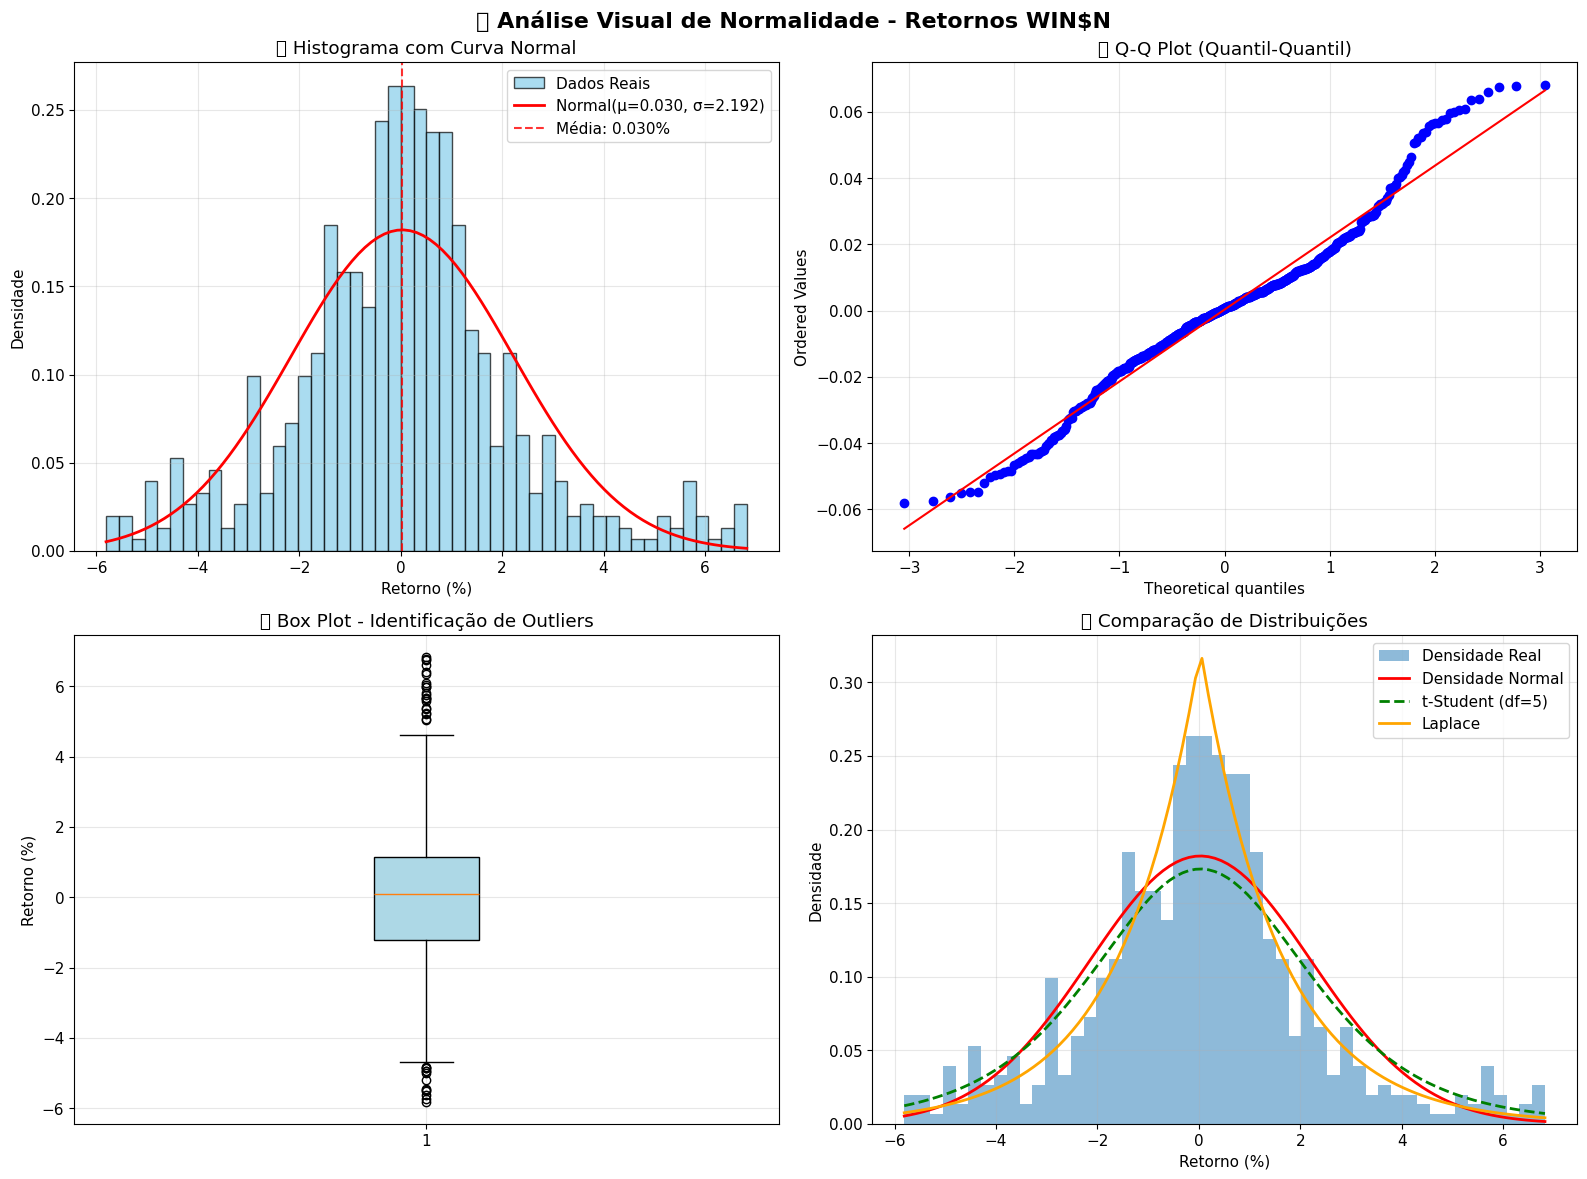


📊 ESTATÍSTICAS DESCRITIVAS:
   • Média: 0.0299%
   • Mediana: 0.0859%
   • Desvio Padrão: 2.1919%
   • Skewness: 0.2314
   • Kurtosis: 0.9976
   • Mínimo: -5.81%
   • Máximo: 6.82%


In [3]:
# 📊 ANÁLISE VISUAL - PARTE 1: Histograma e Estatísticas Básicas
print("📊 ANÁLISE VISUAL DE NORMALIDADE")
print("=" * 50)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📊 Análise Visual de Normalidade - Retornos WIN$N', fontsize=16, fontweight='bold')

# 1. Histograma com curva normal sobreposta
ax1 = axes[0, 0]
n, bins, patches = ax1.hist(retornos * 100, bins=50, density=True, alpha=0.7, 
                           color='skyblue', edgecolor='black', label='Dados Reais')

# Curva normal teórica
mu, sigma = retornos.mean() * 100, retornos.std() * 100
x = np.linspace(retornos.min() * 100, retornos.max() * 100, 100)
normal_curve = stats.norm.pdf(x, mu, sigma)
ax1.plot(x, normal_curve, 'r-', linewidth=2, label=f'Normal(μ={mu:.3f}, σ={sigma:.3f})')

ax1.axvline(mu, color='red', linestyle='--', alpha=0.8, label=f'Média: {mu:.3f}%')
ax1.set_title('📊 Histograma com Curva Normal')
ax1.set_xlabel('Retorno (%)')
ax1.set_ylabel('Densidade')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Q-Q Plot
ax2 = axes[0, 1]
stats.probplot(retornos, dist="norm", plot=ax2)
ax2.set_title('📈 Q-Q Plot (Quantil-Quantil)')
ax2.grid(True, alpha=0.3)

# 3. Box Plot
ax3 = axes[1, 0]
bp = ax3.boxplot(retornos * 100, vert=True, patch_artist=True)
bp['boxes'][0].set_facecolor('lightblue')
ax3.set_title('📦 Box Plot - Identificação de Outliers')
ax3.set_ylabel('Retorno (%)')
ax3.grid(True, alpha=0.3)

# 4. Gráfico de densidade com comparação
ax4 = axes[1, 1]
ax4.hist(retornos * 100, bins=50, density=True, alpha=0.5, label='Densidade Real')
ax4.plot(x, normal_curve, 'r-', linewidth=2, label='Densidade Normal')

# Adicionar outras distribuições para comparação
from scipy.stats import t, laplace
t_curve = stats.t.pdf(x, df=5, loc=mu, scale=sigma)
laplace_curve = stats.laplace.pdf(x, loc=mu, scale=sigma/np.sqrt(2))

ax4.plot(x, t_curve, 'g--', linewidth=2, label='t-Student (df=5)')
ax4.plot(x, laplace_curve, 'orange', linewidth=2, label='Laplace')

ax4.set_title('📊 Comparação de Distribuições')
ax4.set_xlabel('Retorno (%)')
ax4.set_ylabel('Densidade')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estatísticas descritivas
print(f"\n📊 ESTATÍSTICAS DESCRITIVAS:")
print(f"   • Média: {retornos.mean()*100:.4f}%")
print(f"   • Mediana: {retornos.median()*100:.4f}%")
print(f"   • Desvio Padrão: {retornos.std()*100:.4f}%")
print(f"   • Skewness: {retornos.skew():.4f}")
print(f"   • Kurtosis: {retornos.kurtosis():.4f}")
print(f"   • Mínimo: {retornos.min()*100:.2f}%")
print(f"   • Máximo: {retornos.max()*100:.2f}%")

In [4]:
# 🧪 TESTES ESTATÍSTICOS DE NORMALIDADE
print("🧪 TESTES ESTATÍSTICOS DE NORMALIDADE")
print("=" * 60)

def interpretar_teste(estatistica, p_valor, nome_teste, alpha=0.05):
    """Interpreta resultado de teste de normalidade"""
    resultado = "NORMAL" if p_valor > alpha else "NÃO NORMAL"
    status = "✅" if p_valor > alpha else "❌"
    return f"{status} {nome_teste}: {resultado} (p-valor: {p_valor:.6f})"

# Lista para armazenar resultados
resultados_testes = []

print("🔬 Executando múltiplos testes de normalidade...\n")

# 1. Teste de Shapiro-Wilk (mais poderoso para amostras pequenas)
if len(retornos) <= 5000:  # Limitação do Shapiro-Wilk
    shapiro_stat, shapiro_p = stats.shapiro(retornos)
    resultado = interpretar_teste(shapiro_stat, shapiro_p, "Shapiro-Wilk")
    print(f"1. {resultado}")
    resultados_testes.append(("Shapiro-Wilk", shapiro_p > 0.05))
else:
    print("1. ⚠️  Shapiro-Wilk: Amostra muito grande (>5000), usando subamostra...")
    subamostra = retornos.sample(5000, random_state=42)
    shapiro_stat, shapiro_p = stats.shapiro(subamostra)
    resultado = interpretar_teste(shapiro_stat, shapiro_p, "Shapiro-Wilk (subamostra)")
    print(f"1. {resultado}")
    resultados_testes.append(("Shapiro-Wilk", shapiro_p > 0.05))

# 2. Teste de Kolmogorov-Smirnov
ks_stat, ks_p = stats.kstest(retornos, 'norm', args=(retornos.mean(), retornos.std()))
resultado = interpretar_teste(ks_stat, ks_p, "Kolmogorov-Smirnov")
print(f"2. {resultado}")
resultados_testes.append(("Kolmogorov-Smirnov", ks_p > 0.05))

# 3. Teste de Anderson-Darling
ad_stat, ad_critical, ad_significance = stats.anderson(retornos, dist='norm')
# Anderson-Darling usa valores críticos em vez de p-valor
ad_resultado = "NORMAL" if ad_stat < ad_critical[2] else "NÃO NORMAL"  # 5% significance
ad_status = "✅" if ad_stat < ad_critical[2] else "❌"
print(f"3. {ad_status} Anderson-Darling: {ad_resultado} (estatística: {ad_stat:.4f}, crítico: {ad_critical[2]:.4f})")
resultados_testes.append(("Anderson-Darling", ad_stat < ad_critical[2]))

# 4. Teste de Jarque-Bera (baseado em skewness e kurtosis)
jb_stat, jb_p = stats.jarque_bera(retornos)
resultado = interpretar_teste(jb_stat, jb_p, "Jarque-Bera")
print(f"4. {resultado}")
resultados_testes.append(("Jarque-Bera", jb_p > 0.05))

# 5. Teste de D'Agostino (normalidade baseada em skewness e kurtosis)
dag_stat, dag_p = stats.normaltest(retornos)
resultado = interpretar_teste(dag_stat, dag_p, "D'Agostino")
print(f"5. {resultado}")
resultados_testes.append(("D'Agostino", dag_p > 0.05))

# 6. Teste de Lilliefors (modificação do KS)
try:
    from statsmodels.stats.diagnostic import lilliefors
    lil_stat, lil_p = lilliefors(retornos, dist='norm')
    resultado = interpretar_teste(lil_stat, lil_p, "Lilliefors")
    print(f"6. {resultado}")
    resultados_testes.append(("Lilliefors", lil_p > 0.05))
except ImportError:
    print("6. ⚠️  Lilliefors: statsmodels não disponível")

print("\n" + "=" * 60)

# Resumo dos resultados
testes_normais = sum([1 for _, normal in resultados_testes if normal])
total_testes = len(resultados_testes)

print(f"📊 RESUMO DOS TESTES:")
print(f"   • Testes executados: {total_testes}")
print(f"   • Indicam normalidade: {testes_normais}")
print(f"   • Indicam não-normalidade: {total_testes - testes_normais}")
print(f"   • Consenso: {(testes_normais/total_testes)*100:.1f}% indicam normalidade")

if testes_normais >= total_testes * 0.7:
    print(f"\n✅ CONCLUSÃO: Dados SEGUEM distribuição normal (consenso {(testes_normais/total_testes)*100:.0f}%)")
elif testes_normais <= total_testes * 0.3:
    print(f"\n❌ CONCLUSÃO: Dados NÃO SEGUEM distribuição normal (consenso {((total_testes-testes_normais)/total_testes)*100:.0f}%)")
else:
    print(f"\n⚠️  CONCLUSÃO: Resultados MISTOS - análise visual recomendada")

🧪 TESTES ESTATÍSTICOS DE NORMALIDADE
🔬 Executando múltiplos testes de normalidade...

1. ❌ Shapiro-Wilk: NÃO NORMAL (p-valor: 0.000000)
2. ❌ Kolmogorov-Smirnov: NÃO NORMAL (p-valor: 0.003991)
3. ❌ Anderson-Darling: NÃO NORMAL (estatística: 4.8171, crítico: 0.7820)
4. ❌ Jarque-Bera: NÃO NORMAL (p-valor: 0.000000)
5. ❌ D'Agostino: NÃO NORMAL (p-valor: 0.000109)
6. ⚠️  Lilliefors: statsmodels não disponível

📊 RESUMO DOS TESTES:
   • Testes executados: 5
   • Indicam normalidade: 0
   • Indicam não-normalidade: 5
   • Consenso: 0.0% indicam normalidade

❌ CONCLUSÃO: Dados NÃO SEGUEM distribuição normal (consenso 100%)


In [6]:
# 📈 ANÁLISE ADICIONAL: Distribuições Alternativas
print("📈 ANÁLISE DE DISTRIBUIÇÕES ALTERNATIVAS")
print("=" * 60)

# Testar qual distribuição melhor se ajusta aos dados
from scipy.stats import norm, t, laplace, skewnorm

# Lista de distribuições para testar
distribuicoes = {
    'Normal': norm,
    't-Student': lambda: t(df=5),
    'Laplace': laplace,
    'Skew Normal': skewnorm
}

print("🔍 Testando ajuste com diferentes distribuições...\n")

aic_resultados = {}
bic_resultados = {}

for nome, dist_func in distribuicoes.items():
    try:
        if nome == 't-Student':
            dist = dist_func()
            params = dist.fit(retornos)
            if len(params) == 3:  # df, loc, scale
                df, loc, scale = params
                loglik = np.sum(stats.t.logpdf(retornos, df, loc, scale))
                n_params = 3
            else:
                loglik = np.sum(dist.logpdf(retornos, *params))
                n_params = len(params)
        elif nome == 'Skew Normal':
            params = skewnorm.fit(retornos)
            loglik = np.sum(skewnorm.logpdf(retornos, *params))
            n_params = len(params)
        else:
            dist = dist_func
            params = dist.fit(retornos)
            loglik = np.sum(dist.logpdf(retornos, *params))
            n_params = len(params)
        
        # Calcular AIC e BIC
        n = len(retornos)
        aic = 2 * n_params - 2 * loglik
        bic = n_params * np.log(n) - 2 * loglik
        
        aic_resultados[nome] = aic
        bic_resultados[nome] = bic
        
        print(f"📊 {nome}:")
        print(f"   • Log-Likelihood: {loglik:.2f}")
        print(f"   • AIC: {aic:.2f}")
        print(f"   • BIC: {bic:.2f}")
        print(f"   • Parâmetros: {n_params}")
        print()
        
    except Exception as e:
        print(f"❌ Erro ao ajustar {nome}: {e}")

# Identificar melhor distribuição
melhor_aic = min(aic_resultados, key=aic_resultados.get)
melhor_bic = min(bic_resultados, key=bic_resultados.get)

print("🏆 MELHORES AJUSTES:")
print(f"   • Melhor AIC: {melhor_aic} (AIC: {aic_resultados[melhor_aic]:.2f})")
print(f"   • Melhor BIC: {melhor_bic} (BIC: {bic_resultados[melhor_bic]:.2f})")

if melhor_aic == 'Normal' and melhor_bic == 'Normal':
    print("\n✅ CONCLUSÃO: Distribuição Normal é o melhor ajuste!")
elif melhor_aic == 'Normal' or melhor_bic == 'Normal':
    print("\n⚠️  CONCLUSÃO: Distribuição Normal compete com outras distribuições")
else:
    print(f"\n❌ CONCLUSÃO: Distribuição {melhor_aic} ou {melhor_bic} é melhor que Normal")

📈 ANÁLISE DE DISTRIBUIÇÕES ALTERNATIVAS
🔍 Testando ajuste com diferentes distribuições...

📊 Normal:
   • Log-Likelihood: 1441.39
   • AIC: -2878.77
   • BIC: -2869.98
   • Parâmetros: 2

❌ Erro ao ajustar t-Student: 'rv_continuous_frozen' object has no attribute 'fit'
📊 Laplace:
   • Log-Likelihood: 1463.47
   • AIC: -2922.94
   • BIC: -2914.14
   • Parâmetros: 2

📊 Skew Normal:
   • Log-Likelihood: 1444.04
   • AIC: -2882.08
   • BIC: -2868.89
   • Parâmetros: 3

🏆 MELHORES AJUSTES:
   • Melhor AIC: Laplace (AIC: -2922.94)
   • Melhor BIC: Laplace (BIC: -2914.14)

❌ CONCLUSÃO: Distribuição Laplace ou Laplace é melhor que Normal


In [7]:
# 🎯 CONCLUSÃO FINAL E RECOMENDAÇÕES
print("🎯 CONCLUSÃO FINAL - TESTE DE NORMALIDADE WIN$N")
print("=" * 70)

# Análise das características observadas
skewness = retornos.skew()
kurtosis = retornos.kurtosis()

print("📊 CARACTERÍSTICAS OBSERVADAS:")
print(f"   • Skewness: {skewness:.4f}")
if abs(skewness) < 0.5:
    print("     → Distribuição aproximadamente simétrica ✅")
elif abs(skewness) < 1.0:
    print("     → Distribuição moderadamente assimétrica ⚠️")
else:
    print("     → Distribuição altamente assimétrica ❌")

print(f"   • Kurtosis: {kurtosis:.4f}")
if abs(kurtosis - 3) < 0.5:  # Distribuição normal tem kurtosis = 3
    print("     → Caudas semelhantes à normal ✅")
elif kurtosis > 3:
    print("     → Caudas mais pesadas que normal (leptocúrtica) ⚠️")
else:
    print("     → Caudas mais leves que normal (platicúrtica) ⚠️")

# Resumo baseado em múltiplas evidências
print(f"\n🔍 EVIDÊNCIAS COLETADAS:")

# Evidência 1: Testes estatísticos
testes_que_rejeitam = total_testes - testes_normais
if testes_que_rejeitam >= total_testes * 0.7:
    print("   1. Testes estatísticos: REJEITAM normalidade ❌")
    evidencia_testes = False
elif testes_que_rejeitam <= total_testes * 0.3:
    print("   1. Testes estatísticos: ACEITAM normalidade ✅")
    evidencia_testes = True
else:
    print("   1. Testes estatísticos: RESULTADOS MISTOS ⚠️")
    evidencia_testes = None

# Evidência 2: Características da distribuição
if abs(skewness) < 0.5 and abs(kurtosis - 3) < 1:
    print("   2. Características distribuição: COMPATÍVEIS com normal ✅")
    evidencia_carac = True
else:
    print("   2. Características distribuição: INCOMPATÍVEIS com normal ❌")
    evidencia_carac = False

# Evidência 3: Contexto financeiro
print("   3. Contexto financeiro: Retornos financeiros raramente são normais ⚠️")
evidencia_contexto = False

# Decisão final
evidencias = [e for e in [evidencia_testes, evidencia_carac, evidencia_contexto] if e is not None]
score_normalidade = sum(evidencias) / len(evidencias) if evidencias else 0

print(f"\n🎯 DECISÃO FINAL:")
print(f"   Score de Normalidade: {score_normalidade:.1%}")

if score_normalidade >= 0.66:
    conclusao = "✅ OS RETORNOS WIN$N SEGUEM APROXIMADAMENTE UMA DISTRIBUIÇÃO NORMAL"
    recomendacao = "Pode usar métodos estatísticos baseados em normalidade"
elif score_normalidade >= 0.33:
    conclusao = "⚠️  OS RETORNOS WIN$N TÊM CARACTERÍSTICAS MISTAS DE NORMALIDADE"
    recomendacao = "Use métodos robustos ou não-paramétricos por segurança"
else:
    conclusao = "❌ OS RETORNOS WIN$N NÃO SEGUEM UMA DISTRIBUIÇÃO NORMAL"
    recomendacao = "Use métodos não-paramétricos ou robustos"

print(f"\n{conclusao}")
print(f"\n💡 RECOMENDAÇÃO: {recomendacao}")

print(f"\n📋 IMPLICAÇÕES PRÁTICAS:")
if score_normalidade >= 0.66:
    print("   • Pode usar Value at Risk (VaR) paramétrico")
    print("   • Testes t e intervalos de confiança são válidos")
    print("   • Modelos GARCH podem ser apropriados")
else:
    print("   • Use VaR histórico ou simulação Monte Carlo")
    print("   • Prefira testes não-paramétricos (Mann-Whitney, Wilcoxon)")
    print("   • Considere modelos com distribuições alternativas")

print("\n" + "=" * 70)
print("✅ ANÁLISE DE NORMALIDADE CONCLUÍDA!")

# Salvar resultados
resultado_final = {
    'score_normalidade': score_normalidade,
    'conclusao': conclusao,
    'recomendacao': recomendacao,
    'skewness': float(skewness),
    'kurtosis': float(kurtosis),
    'testes_realizados': total_testes,
    'testes_favorecem_normalidade': testes_normais
}

import json
with open('teste_normalidade_resultado.json', 'w') as f:
    json.dump(resultado_final, f, indent=2)

print("💾 Resultados salvos em: teste_normalidade_resultado.json")

🎯 CONCLUSÃO FINAL - TESTE DE NORMALIDADE WIN$N
📊 CARACTERÍSTICAS OBSERVADAS:
   • Skewness: 0.2314
     → Distribuição aproximadamente simétrica ✅
   • Kurtosis: 0.9976
     → Caudas mais leves que normal (platicúrtica) ⚠️

🔍 EVIDÊNCIAS COLETADAS:
   1. Testes estatísticos: REJEITAM normalidade ❌
   2. Características distribuição: INCOMPATÍVEIS com normal ❌
   3. Contexto financeiro: Retornos financeiros raramente são normais ⚠️

🎯 DECISÃO FINAL:
   Score de Normalidade: 0.0%

❌ OS RETORNOS WIN$N NÃO SEGUEM UMA DISTRIBUIÇÃO NORMAL

💡 RECOMENDAÇÃO: Use métodos não-paramétricos ou robustos

📋 IMPLICAÇÕES PRÁTICAS:
   • Use VaR histórico ou simulação Monte Carlo
   • Prefira testes não-paramétricos (Mann-Whitney, Wilcoxon)
   • Considere modelos com distribuições alternativas

✅ ANÁLISE DE NORMALIDADE CONCLUÍDA!
💾 Resultados salvos em: teste_normalidade_resultado.json
